`Projeto 02.`

# <center> Análise sobre Veículos Usados - Kaggle </center>



    Este dataset foi retirado do `Kaggle` e contém informações a respeito de veículos usados na Alemanha e que estão à venda no Ebay.

    Objetivos dessa abordagem:
    
        1. Plot da Distribuição de Veículos com base no Ano de Registro.
        2. Variação da Faixa de Preço pelo Tipo de Veículo (verificar outliers).
        3. Contagem Total de Veículos à venda conforme o Tipo de Veículo.
        4. Número de Veículos Pertencentes a cada Marca.
        5. Preço Médio dos Veículos com base no Tipo de veículo, bem como no tipo de Caixa de Câmbio.
        6. Preço médio do Veículo por tipo de combustível e tipo de caixa de câmbio.
        7. Potência Média de um Veículo por Tipo de Veículo e Caixa de Câmbio
               
    

- Dataset: https://www.kaggle.com/orgesleka/used-cars-database
- Créditos: DSA - Python Fundamentos Para Análise de Dados



## <font color = 'purple'> Preparação e Exploração dos Dados </font>
    
<font color = 'purple'>  * Manipulando os dados e corrigindo eventuais problemas </font>

In [1]:
from platform import python_version
print(f"Versão Python: {python_version()}")

Versão Python: 3.8.12


In [2]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")
%matplotlib inline

In [3]:
# Dataset
datasetAutos = "dataset/autos.csv"
df = pd.read_csv(datasetAutos,encoding="latin-1")

In [4]:
# Visualizando as primeiras 3 linhas 
df.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4


In [5]:
# Colocando as variáveis em uma lista para melhor visualização ---> 27 colunas -->  27 VARIÁVEIS
list = df.keys()
x=1
for i in list: 
    print(f"{x} - {i}")
    x+=1

1 - dateCrawled
2 - name
3 - seller
4 - offerType
5 - price
6 - abtest
7 - vehicleType
8 - yearOfRegistration
9 - gearbox
10 - powerPS
11 - model
12 - kilometer
13 - monthOfRegistration
14 - fuelType
15 - brand
16 - notRepairedDamage
17 - dateCreated
18 - postalCode
19 - lastSeen
20 - yearOfCreation
21 - yearCrawled
22 - monthOfCreation
23 - monthCrawled
24 - NoOfDaysOnline
25 - NoOfHrsOnline
26 - yearsOld
27 - monthsOld


In [6]:
# Verificando se há valores nulos e somando esses valores
df.isnull().sum()

dateCrawled              0
name                     0
seller                   0
offerType                0
price                    0
abtest                   0
vehicleType              0
yearOfRegistration       0
gearbox                  0
powerPS                  0
model                    0
kilometer                0
monthOfRegistration      0
fuelType               189
brand                    0
notRepairedDamage        0
dateCreated              0
postalCode               0
lastSeen                 0
yearOfCreation           0
yearCrawled              0
monthOfCreation          0
monthCrawled             0
NoOfDaysOnline           0
NoOfHrsOnline            0
yearsOld                 0
monthsOld                0
dtype: int64

In [7]:
df.groupby(['fuelType']).count()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
fuelType,,,,,,,,,,,,,,,,,,,,,
Cng,508,508,508,508,508,508,508,508,508,508,...,508,508,508,508,508,508,508,508,508,508
Diesel,86355,86355,86355,86355,86355,86355,86355,86355,86355,86355,...,86355,86355,86355,86355,86355,86355,86355,86355,86355,86355
Electric,57,57,57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
Gasoline,196056,196056,196056,196056,196056,196056,196056,196056,196056,196056,...,196056,196056,196056,196056,196056,196056,196056,196056,196056,196056
Hybrid,147,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147
Lpg,5046,5046,5046,5046,5046,5046,5046,5046,5046,5046,...,5046,5046,5046,5046,5046,5046,5046,5046,5046,5046
Other,25329,25329,25329,25329,25329,25329,25329,25329,25329,25329,...,25329,25329,25329,25329,25329,25329,25329,25329,25329,25329


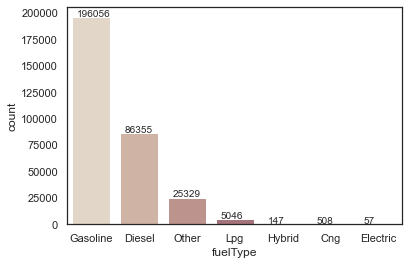

In [8]:
g = sns.countplot(x='fuelType', data=df, palette="ch:.25")
for p in g.patches:
    g.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

In [9]:
# Aplicando imputação e preenchendo os valores ausentes com 0
df['fuelType'].fillna(df['fuelType'].mode()[0], inplace = True)

In [10]:
# Não houve alteração nos dados existentes
df.groupby(['fuelType']).count()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
fuelType,,,,,,,,,,,,,,,,,,,,,
Cng,508,508,508,508,508,508,508,508,508,508,...,508,508,508,508,508,508,508,508,508,508
Diesel,86355,86355,86355,86355,86355,86355,86355,86355,86355,86355,...,86355,86355,86355,86355,86355,86355,86355,86355,86355,86355
Electric,57,57,57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
Gasoline,196245,196245,196245,196245,196245,196245,196245,196245,196245,196245,...,196245,196245,196245,196245,196245,196245,196245,196245,196245,196245
Hybrid,147,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147
Lpg,5046,5046,5046,5046,5046,5046,5046,5046,5046,5046,...,5046,5046,5046,5046,5046,5046,5046,5046,5046,5046
Other,25329,25329,25329,25329,25329,25329,25329,25329,25329,25329,...,25329,25329,25329,25329,25329,25329,25329,25329,25329,25329


In [11]:
# Agora sim, nenhum dados ausente
df.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
yearOfCreation         0
yearCrawled            0
monthOfCreation        0
monthCrawled           0
NoOfDaysOnline         0
NoOfHrsOnline          0
yearsOld               0
monthsOld              0
dtype: int64

In [12]:
# Tamanho (Linhas, Colunas)
df.shape

(313687, 27)

### <font color='blue'> 1. Plot da Distribuição de Veículos com base no Ano de Registro.</font>

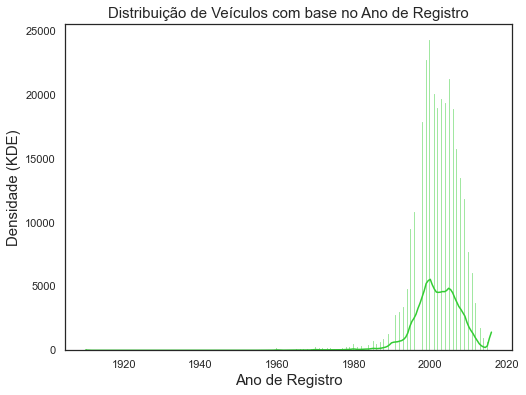

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(df["yearOfRegistration"], color="#33cc33",kde=True, ax=ax)
ax.set_title('Distribuição de Veículos com base no Ano de Registro', fontsize= 15)
plt.ylabel("Densidade (KDE)", fontsize= 15)
plt.xlabel("Ano de Registro", fontsize= 15)
plt.show()

# Verifica-se que houve um aumento considerável no registro de automóveis a partir dos anos 80, possivelmente
# pela evolução tecnológica e aumento na demanda.

### <font color='blue'> 2. Variação da faixa de preço pelo Tipo de Veículo.</font>

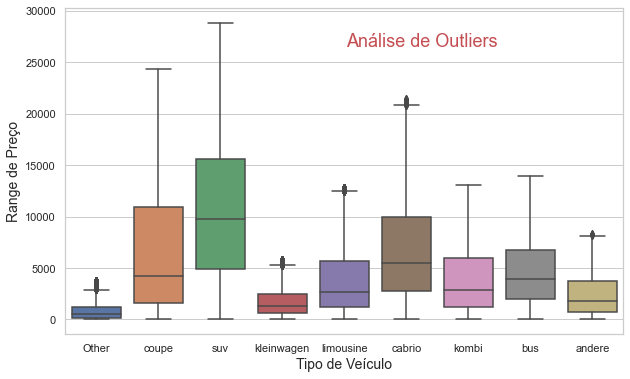

In [14]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x="vehicleType", y="price", data=df)
ax.text(5.25,27000,"Análise de Outliers",fontsize=18,color="r",ha="center", va="center")
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':14})
ax.yaxis.set_label_text("Range de Preço",fontdict= {'size':14})
plt.show()

# Apesar da variação de preço dos veículos como a SUV e Coupe que tiveram aumentos significativos
# não há índicio claro da presença de outlier.

### <font color = 'blue'> 3. Contagem Total de Veículos à Venda conforme o Tipo de Veículo. </font>

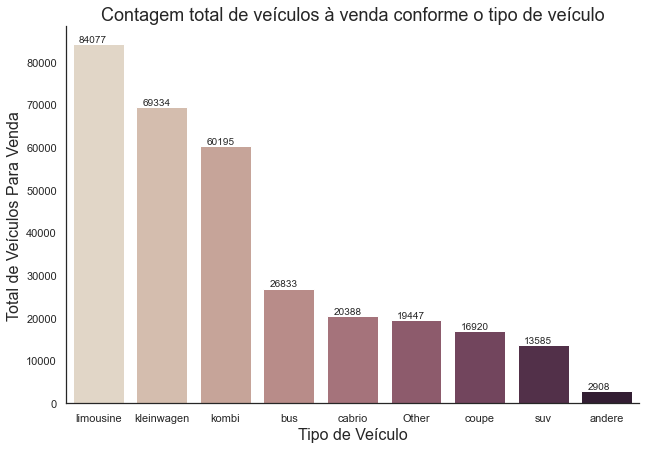

In [15]:
sns.set_style("white")
g = sns.catplot(x="vehicleType", data=df, kind="count", palette="ch:.25", height=6, aspect=1.5, order = df['vehicleType'].value_counts().index)
g.ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Total de Veículos Para Venda", fontdict= {'size':16})
g.ax.set_title("Contagem total de veículos à venda conforme o tipo de veículo",fontdict= {'size':18})
# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))
    
# Os veículos com maior quantidade para venda são a limousine, kleinwagen e a kombi.

### <font color = 'blue'>  4. Número de Veículos Pertencentes a cada Marca - (em ordem decrescente) </font>

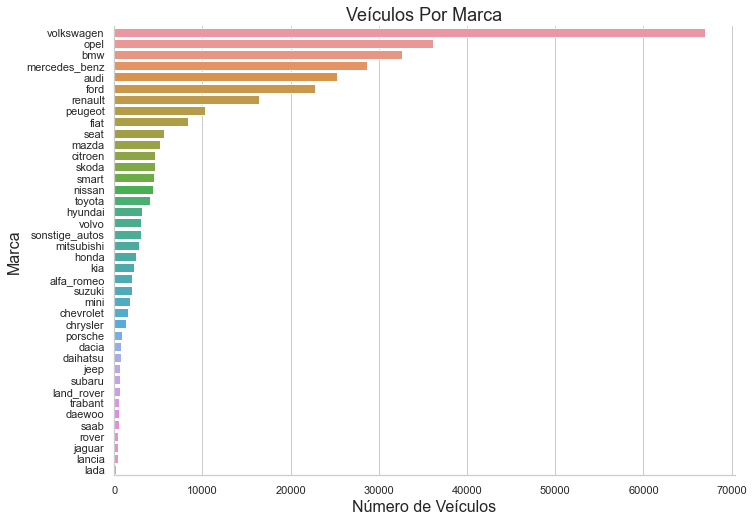

In [16]:
sns.set_style("whitegrid")
g = sns.catplot(y="brand", data=df, kind="count", height=7, aspect=1.5,  order = df['brand'].value_counts().index)
g.ax.set_title("Veículos Por Marca",fontdict={'size':18})
g.ax.xaxis.set_label_text("Número de Veículos",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Marca",fontdict= {'size':16})
plt.show()

# Volkswagen é a marca que disparada tem o maior número de carros usados à venda.

### <font color = 'blue'> 5. Preço Médio dos Veículos com base no Tipo de Veículo e Caixa de Câmbio. </font>

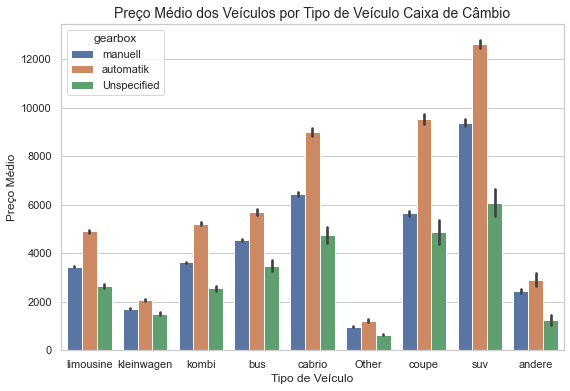

In [17]:
fig, ax = plt.subplots(figsize=(9,6))
sns.barplot(x="vehicleType", y="price",hue="gearbox", palette="deep", data=df, order = df['vehicleType'].value_counts().index)
ax.set_title("Preço Médio dos Veículos por Tipo de Veículo Caixa de Câmbio",fontdict= {'size':14})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':12})
ax.yaxis.set_label_text("Preço Médio",fontdict= {'size':12})
plt.show()

# Constata-se que os automóveis com câmbio automático são mais caros que os com câmbio manual
# em todos os tipos de veículos catalogados o que condiz com os custos do fabricante.

### <font color = 'blue'> 6. Preço Médio do Veículo por Tipo de Combustível e Caixa de Câmbio (gearbox) </font>

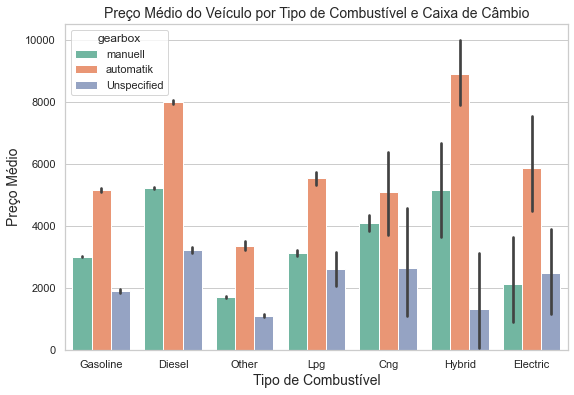

In [18]:
fig, ax = plt.subplots(figsize=(9,6))
sns.barplot(x="fuelType", y="price",hue="gearbox", palette="Set2",data=df,  order = df['fuelType'].value_counts().index)
ax.set_title("Preço Médio do Veículo por Tipo de Combustível e Caixa de Câmbio",fontdict= {'size':14})
ax.xaxis.set_label_text("Tipo de Combustível",fontdict= {'size':14})
ax.yaxis.set_label_text("Preço Médio",fontdict= {'size':14})
plt.show()

# Verifica-se que o preço médio dos veículos com "Tipo de Combustível - Híbrido ou Diesel" e 
# "Caixa de Câmbio - Automático" possuem valores mais elevados;

# Em média os veículos com Câmbio Manual e a Gasolina são mais baratos.

### <font color = 'blue'> 7. Potência Média de um Veículo por Tipo de Veículo e Caixa de Câmbio </font>

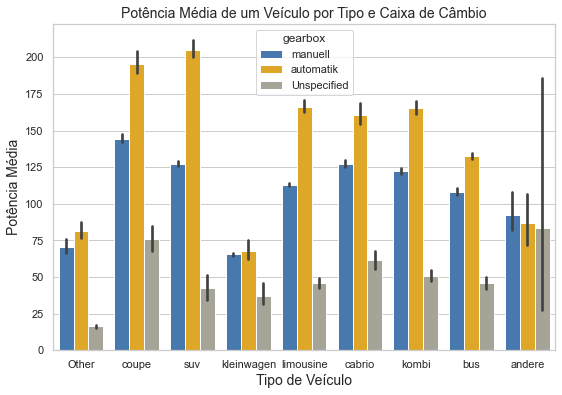

In [19]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
fig, ax = plt.subplots(figsize=(9,6))
sns.set_palette(sns.xkcd_palette(colors))
sns.barplot(x="vehicleType", y="powerPS",hue="gearbox",data=df)
ax.set_title("Potência Média de um Veículo por Tipo e Caixa de Câmbio",fontdict= {'size':14})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':14})
ax.yaxis.set_label_text("Potência Média",fontdict= {'size':14})
plt.show()

# Veículos automáticos têm potência média maior que os manuais na maioria dos veículos catalogados;
# Na categoria "andere" a potência é semelhante.

### Fim

#### Obrigada.